In [27]:
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np


In [28]:
print(tf.__version__)

2.15.0


In [29]:
#dataset of images with digits
mnist = tf.keras.datasets.mnist
mnistData= mnist.load_data()

In [30]:
#Split into train and test
(X_train, y_train), (X_test, y_test) = mnistData

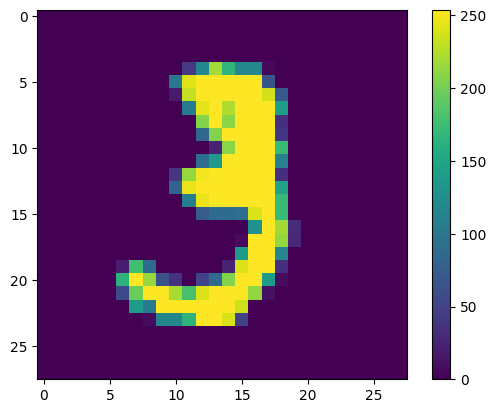

In [31]:
#Vizualize the first image on the training set
plt.figure()
plt.imshow(X_train[10])
plt.colorbar()
plt.show()

In [32]:
#Preprocess data
#imges 28x28 np arrays, wil pixel values ranging from 0 to 255
#Rescaling these to be between 0 and 1 (dividing by 255)
X_train, X_test = X_train/255, X_test/255


In [33]:
#model definition
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

In [34]:
#model compilation
model.compile(optimizer = 'sgd', loss = 'sparse_categorical_crossentropy', metrics =['accuracy'])

In [35]:
model.fit(X_train, y_train, epochs = 10, validation_split = 0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7203 - loss: 1.0874 - val_accuracy: 0.9043 - val_loss: 0.3630
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8897 - loss: 0.3878 - val_accuracy: 0.9186 - val_loss: 0.2971
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9079 - loss: 0.3208 - val_accuracy: 0.9283 - val_loss: 0.2641
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9176 - loss: 0.2894 - val_accuracy: 0.9342 - val_loss: 0.2410
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9272 - loss: 0.2601 - val_accuracy: 0.9402 - val_loss: 0.2209
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9340 - loss: 0.2390 - val_accuracy: 0.9438 - val_loss: 0.2071
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9364 - loss: 0.2263 - val_accuracy: 0.9473 - val_loss: 0.1944
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9427 - loss: 0.2028 - 

In [36]:
# Evaluate the model
# Checking how the model perfoms on the test dataset
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print('Test accuracy:', test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9456 - loss: 0.1916
Test accuracy: 0.9538000226020813


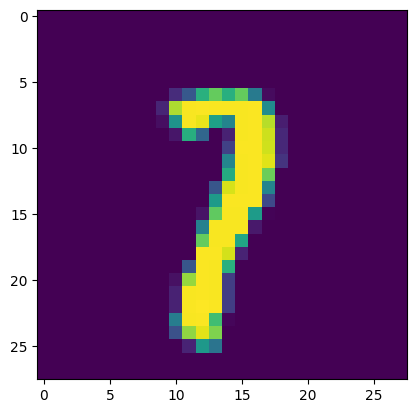

In [44]:
# Pick and Visualize a single test image from test data
single_test_image = X_test[111]
single_test_image = np.array(single_test_image, dtype= 'float')
plt.imshow(single_test_image)
plt.show()

In [45]:
# Predict the test data using the model
single_test_image = (np.expand_dims(single_test_image,0))
pred = model.predict (single_test_image)
digit_value = np.argmax(pred[0])
digit_value

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


7

In [39]:
model.save("model.keras")